In [1]:
import pandas as pd
#important library in pyhton used for data manipulation and visualization. 
import numpy as np
#numpy is  used  for scientific calculation.
import seaborn as sns
# its used for high quality printing of the grpah which is built on top of matplot. 
import matplotlib.pyplot as plt
# matplot is used for data visualization.
from statsmodels.graphics.tsaplots import plot_acf
# acf is used for plotting autocorrelation function.
from statsmodels.tsa.stattools import adfuller
# adfuller is used to check if the time series is stationary or not.

In [2]:
df=pd.read_csv('stock_data.csv',parse_dates=True,index_col='Date')
# parse_dates are used to detect and  convert date 
# like strings into dataset time series format,
#index_col is used to name that column as date
df.head()
# printing the top 5 rows of the data set

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [3]:
df.drop(columns='Unnamed: 0',inplace=True)
# column named 'unamed; being removed and using inplace for covering the dropped space 
df.head()
# printing the top 5 rows to check if the column is dropped or not

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


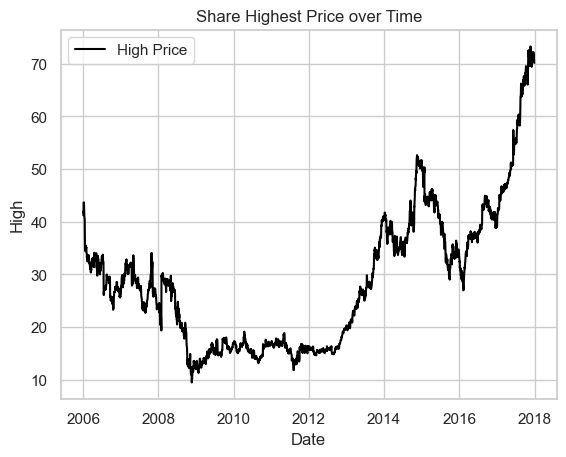

In [4]:
sns.set(style='whitegrid')
# sns.set is used to set the asthestic format of the graph 
# style whitegrid is used for white background with grids for the plot
plt.figure(figure=(18,10))
sns.lineplot(data=df,x='Date',y='High',label='High Price',color='black')
# light plot is being plot between date and high columns.
# label is the description of the line
# black is the color assigned to it
plt.xlabel('Date')
# x axis being labelled as date
plt.ylabel('High')
# x axis being labelled as high
plt.title('Share Highest Price over Time')
# title of the graph is given
plt.show()
# for displaying only the graph only

In [19]:
df.drop(columns='Name',inplace=True)
# removing the column name since it has no meaning value

C:\Users\binuk\AppData\Local\Temp\ipykernel_7068\3526007466.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_rs=df.resample('M').mean()


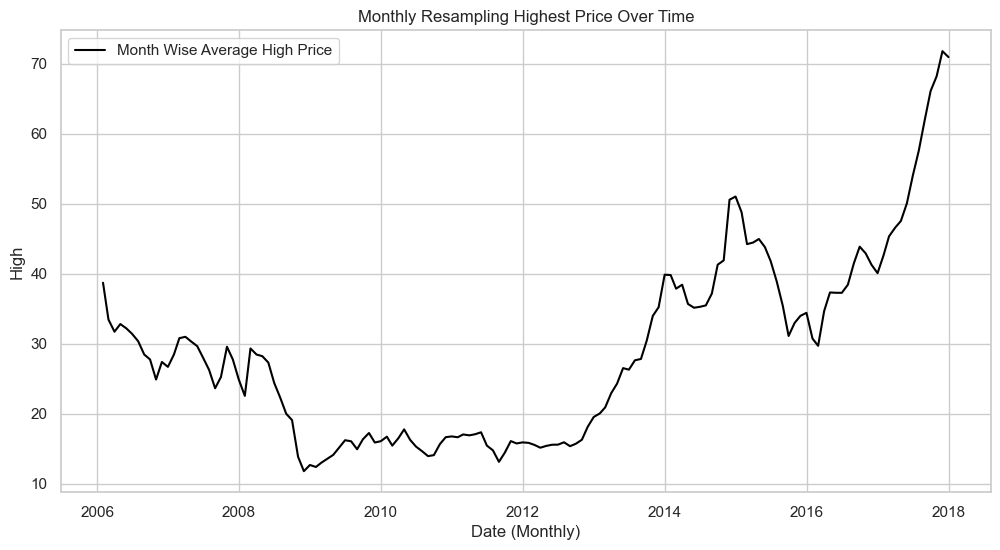

In [27]:
df_rs=df.resample('M').mean()
# sampeling is used to reduce the size 
sns.set(style='whitegrid')
# setting the background as white and putting the grids
plt.figure(figsize=(12,6))
# setting the figure size
sns.lineplot(data=df_rs, x=df_rs.index, y='High',label='Month Wise Average High Price',color='black')
# line plot being plotted where date is being taken from resampled daata
plt.xlabel('Date (Monthly)')
# x axis is named date(monthly)
plt.ylabel('High')
# y axis is named after high
plt.title('Monthly Resampling Highest Price Over Time')
# title of the graph is displayed
plt.show()            
# for displaying only the graph only
             

<Figure size 1200x600 with 0 Axes>

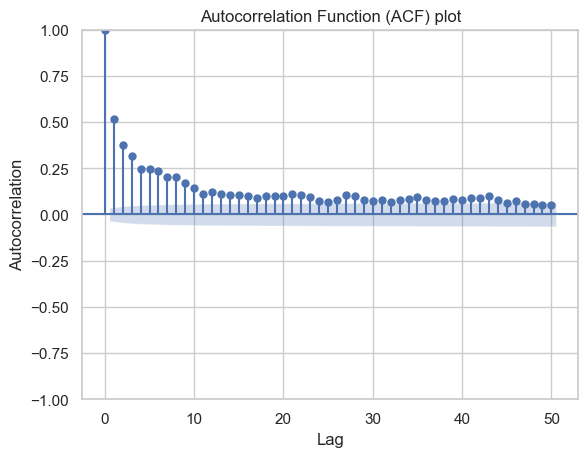

In [59]:
plt.figure(figsize=(12,6))
# setting the figure size of the figure 
plot_acf(df['Volume'],lags=50)
# plot acf is used to create a autocoorelation function(acf) plot
plt.xlabel('Lag')
# x axis is labelled as lag
plt.ylabel('Autocorrelation')
# y axis is labelled as Autocorrelation
plt.title('Autocorrelation Function (ACF) plot')
# title of plot is named using this
plt.show()
# to display the function by showing only the plot

In [63]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])

print('ADF Statistic:',result[0])

print('p-value:',result[1])

print('Critical Values:',result[4])

ADF Statistic: 0.7671404880535949
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


<function matplotlib.pyplot.show(close=None, block=None)>

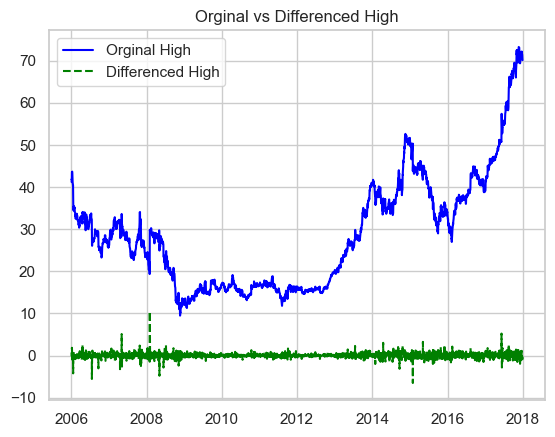

In [69]:
df['high_diff']=df['High'].diff()
# differencing high_diff with high
plt.figure(figure=(12,6))
# setting the height of the figure
plt.plot(df['High'],label='Orginal High',color='blue')
# plotting a graph of column high with label orginal high and color blue
plt.plot(df['high_diff'],label='Differenced High',linestyle='--',color='green')
# plotting a graph of high_difference with label Differenced High
# linestyle being set and color as green
plt.legend()
# for labeling the graph
plt.title('Orginal vs Differenced High')
# title of the graph
plt.show
# showing only the graph 


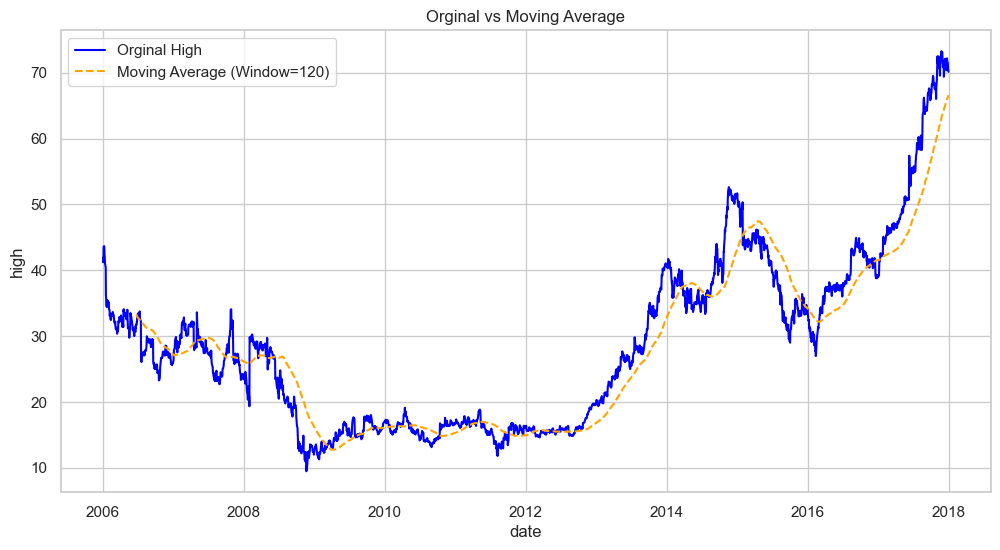

In [75]:
window_size=120
df['high_smoothed']=df['High'].rolling(window=window_size).mean()
# rolling window is used to smooth out the lines
plt.figure(figsize=(12,6))
# size of the graph  
plt.plot(df['High'],label='Orginal High',color='blue')
# plotting a graph is plotted with high column with label 'Orginal high' and color blue
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')
# plotted a line graph on high_smooth with -- line stye and color orange
plt.xlabel('date')
# x axis is labelled as date
plt.ylabel('high')
# y label is labelled as high
plt.title('Orginal vs Moving Average')
# title of the graph is labelled
plt.legend()
# to show the desciption of the line 
plt.show()
# graph is being displayed 

In [85]:
df_combined=pd.concat([df['High'],df['high_diff']],axis=1)
# combining both high and high_diff column 
print(df_combined.head())
# displaying to recheck the output


             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [89]:
df.dropna(subset=['high_diff'],inplace=True)
# dropping the null values or nan values in column high_diff
df['high_diff'].head()
# output of the top 5 rows

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64